In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

In [5]:
df = pd.read_pickle('Daten.pkl')

In [6]:
df

,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,id,Geschlecht,Alter,Interesse
0,1,15.0,1,1-2 Year,No,2630.0,124.0,74,317635,Male,76,0.0
1,1,28.0,0,1-2 Year,Yes,2630.0,125.0,213,337993,Male,43,0.0
2,1,33.0,0,1-2 Year,Yes,27204.0,124.0,114,160325,Male,20,0.0
3,1,46.0,1,< 1 Year,No,31999.0,152.0,251,141620,Male,24,0.0
4,1,49.0,0,1-2 Year,Yes,28262.0,26.0,60,75060,Male,51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,12.0,1,< 1 Year,No,26745.0,160.0,153,130942,Female,22,0.0
381105,1,33.0,0,> 2 Years,Yes,40301.0,124.0,166,295763,Female,42,0.0
381106,1,36.0,1,< 1 Year,No,59649.0,160.0,104,163752,Female,26,0.0
381107,1,28.0,0,1-2 Year,Yes,45937.0,157.0,119,364306,Male,45,0.0


## Mappen der Kategorischen Features in zahlen 

## Datensatz Manipulation

In [7]:
df['Vorschaden'] = df['Vorschaden'].map({'No': 0, 'Yes': 1})
df['Geschlecht']= df['Geschlecht'].map({'Male': 0, 'Female': 1})
df['Alter_Fzg'] = df['Alter_Fzg'].map({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2})
#df = pd.get_dummies(df, columns=['Vorschaden','Vorversicherung']) #+2%ACC
df

,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,id,Geschlecht,Alter,Interesse
0,1,15.0,1,1,0,2630.0,124.0,74,317635,0,76,0.0
1,1,28.0,0,1,1,2630.0,125.0,213,337993,0,43,0.0
2,1,33.0,0,1,1,27204.0,124.0,114,160325,0,20,0.0
3,1,46.0,1,0,0,31999.0,152.0,251,141620,0,24,0.0
4,1,49.0,0,1,1,28262.0,26.0,60,75060,0,51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,12.0,1,0,0,26745.0,160.0,153,130942,1,22,0.0
381105,1,33.0,0,2,1,40301.0,124.0,166,295763,1,42,0.0
381106,1,36.0,1,0,0,59649.0,160.0,104,163752,1,26,0.0
381107,1,28.0,0,1,1,45937.0,157.0,119,364306,0,45,0.0


In [8]:
nancount = df.isna().sum()
nancount

Fahrerlaubnis      0
Regional_Code      0
Vorversicherung    0
Alter_Fzg          0
Vorschaden         0
Jahresbeitrag      0
Vertriebskanal     0
Kundentreue        0
id                 0
Geschlecht         0
Alter              0
Interesse          0
dtype: int64

In [9]:

df = df.drop(columns = ['id'])

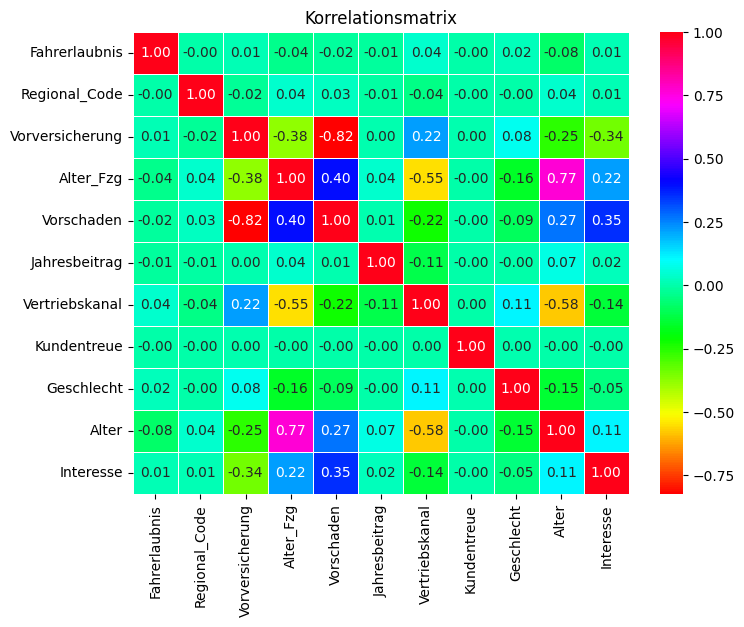

In [10]:
korrelationen = df.corr()
#print(Korrelationen)

# Heatmap Korrelationsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(korrelationen, annot=True, cmap='hsv', fmt=".2f", linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()


## Balancieren des DS durch undersampling

In [11]:

X = df.drop(columns=["Interesse"])  
y = df["Interesse"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE Oversampling 
smote = SMOTE(sampling_strategy="auto", random_state=42)  # "auto" gleicht Klassen aus
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Vorherige Klassenverteilung:", Counter(y_train))
print("Neue Klassenverteilung:", Counter(y_train_resampled))


#daten Speichern
df = pd.DataFrame(X_train_resampled, columns=X.columns)
df["Interesse"] = y_train_resampled  # Label hinzufügen
df = df.sample(frac=1).reset_index(drop=True) #datensatz mischen


Vorherige Klassenverteilung: Counter({0.0: 267519, 1.0: 37368})
Neue Klassenverteilung: Counter({0.0: 267519, 1.0: 267519})


## Verhältnis klassen

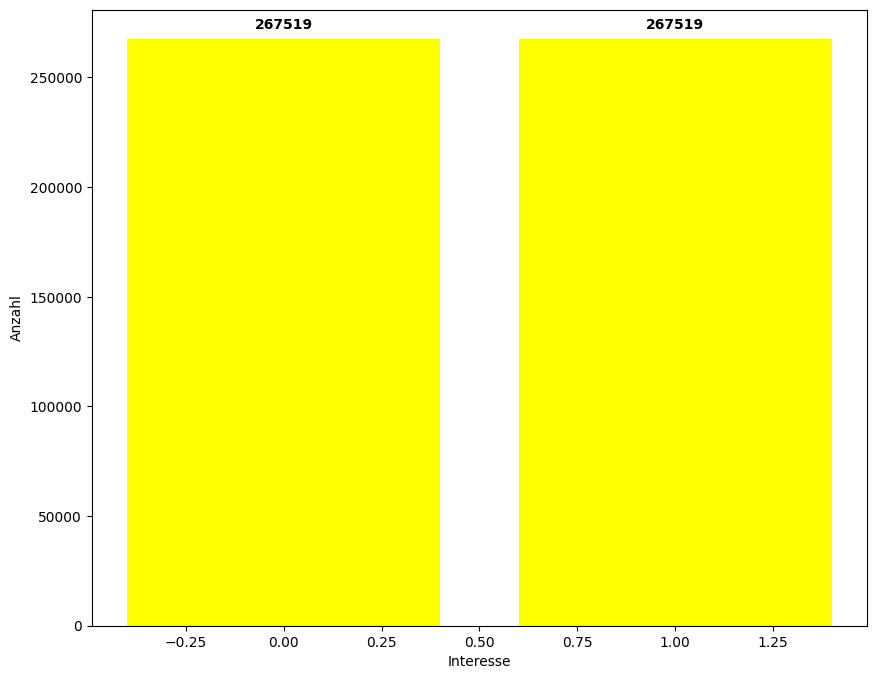

In [12]:
category_counts = df['Interesse'].value_counts()
fig, ax = plt.subplots(1, figsize=(10, 8))
bars = ax.bar(category_counts.index, category_counts, color= 'yellow')
ax.bar_label(bars, padding=5, fontsize=10, fontweight='bold')
plt.ylabel('Anzahl')
plt.xlabel('Interesse')
plt.show()

## Korrelation nach Undersampling

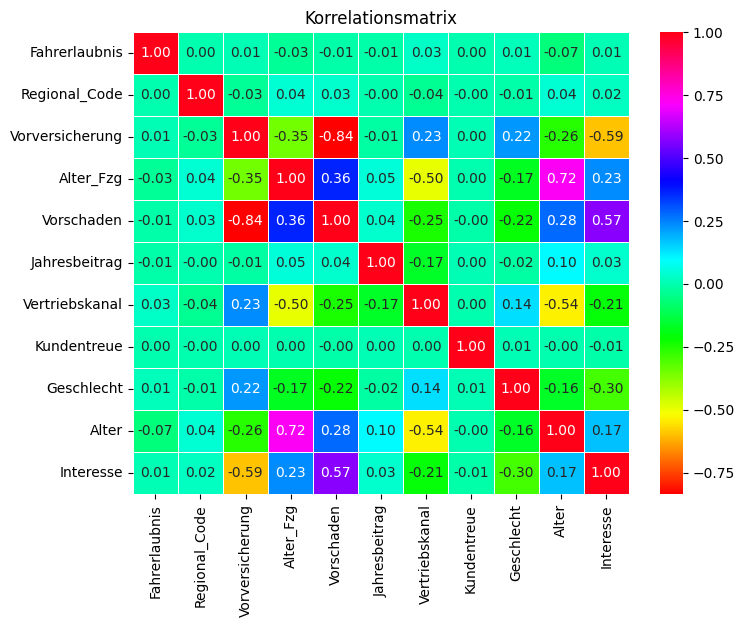

In [13]:
korrelationen = df.corr()
#print(Korrelationen)

# Heatmap Korrelationsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(korrelationen, annot=True, cmap='hsv', fmt=".2f", linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

## Schauen ob Datensatz gemischt

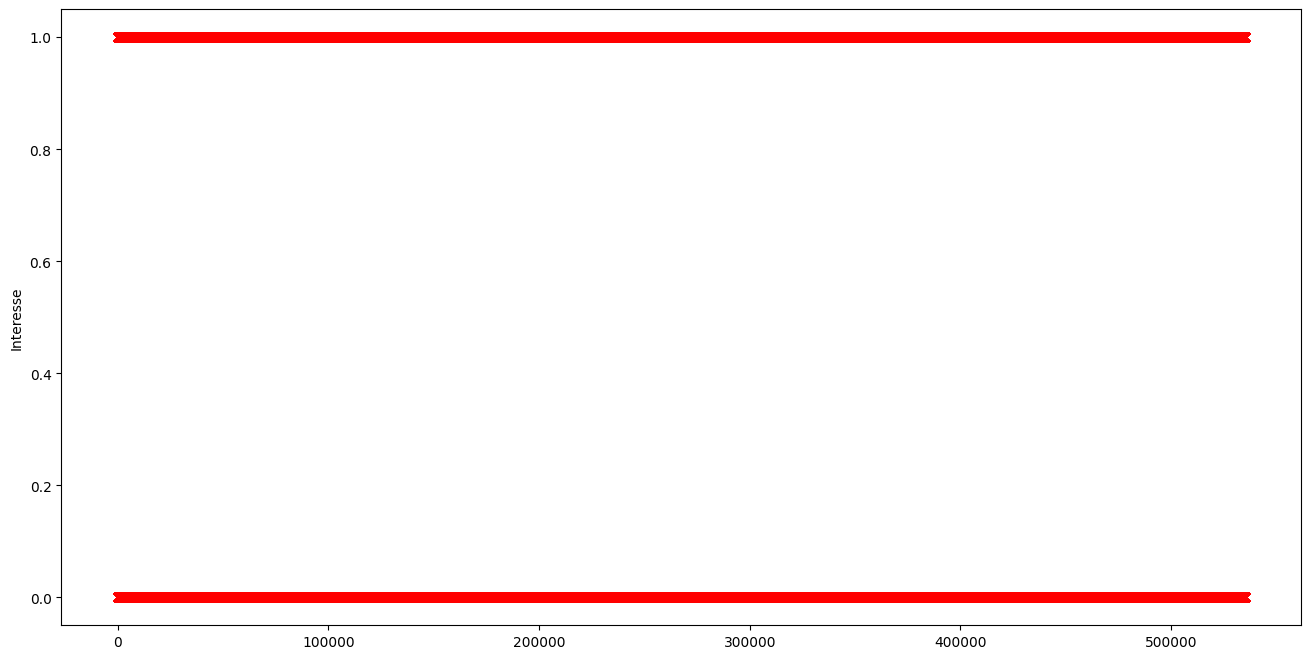

In [14]:
fig, (ax2) = plt.subplots(1, figsize = (16,8))
scatter = ax2.scatter(df.index, df['Interesse'], c='red', marker = 'x')
plt.ylabel('Interesse')
plt.show()

## Vorbereiteten Datensatz speichern

In [15]:
df.to_pickle('datenVorbOversampling.pkl')